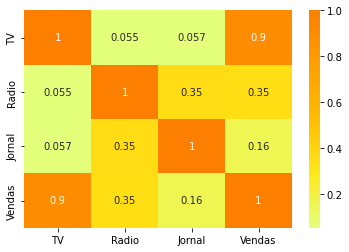

0.8734049964709073
0.9316688704648199


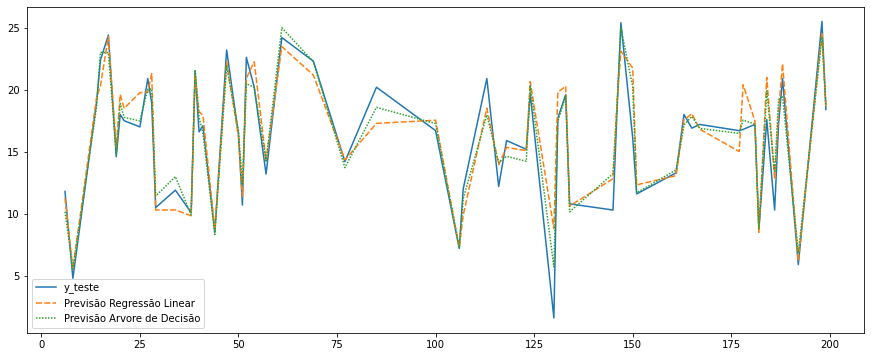

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.299  8.916 20.552]


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

tabela = pd.read_csv("advertising.csv")
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)
plt.show()

y = tabela["Vendas"]
x = tabela.drop("Vendas", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

modelo_rl = LinearRegression()
modelo_ad = RandomForestRegressor()

modelo_rl.fit(x_treino, y_treino)
modelo_ad.fit(x_treino, y_treino)

previsao_rl = modelo_rl.predict(x_teste)
previsao_ad = modelo_ad.predict(x_teste)

print(metrics.r2_score(y_teste, previsao_rl))
print(metrics.r2_score(y_teste, previsao_ad))

tabela_aux = pd.DataFrame()
tabela_aux["y_teste"] = y_teste
tabela_aux["Previsão Regressão Linear"] = previsao_rl
tabela_aux["Previsão Arvore de Decisão"] = previsao_ad

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_aux)
plt.show()

nova_tabela = pd.read_csv("novos.csv")
previsao = modelo_ad.predict(nova_tabela)
display(nova_tabela)
print(previsao)